# kNN Classification on Loan Prediction Dataset

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
# Load dataset
df= pd.read_csv(r"C:\Users\potla\ML_LAB\DataSets\Loan Prediction Dataset.csv")

df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Identify NULL values**

In [6]:
nulls= df.isnull()
nulls

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
nulls.sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
# Replacing NULLs from numerical columns
df['LoanAmount'].fillna(df.mean(skipna= True)['LoanAmount'], inplace= True)
df['Loan_Amount_Term'].fillna(df.mean(skipna= True)['Loan_Amount_Term'], inplace= True)
df['Credit_History'].fillna(df.mean(skipna= True)['Credit_History'], inplace= True)

In [10]:
# Replacing NULLs from categorical coumns
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)

In [11]:
nulls_after_replacing= df.isnull()
nulls_after_replacing.sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Identify Duplicate Records**

In [12]:
df[df.duplicated(subset= None, keep= 'first')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There are no duplicate rows in the dataset.

In [13]:
df.drop(['Loan_ID'], axis= 1, inplace= True)

'Loan_ID' is not necessary


**Performing Data Normalization**

In [14]:
# Making copy of dataframe with only numerical data
dfc= df.copy()
dfc.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], axis= 1, inplace= True)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [16]:
dfc_scaled= scaler.fit_transform(dfc.to_numpy())

In [17]:
dfc_scaled= pd.DataFrame(dfc_scaled, columns= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])
dfc_scaled.tail(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
609,0.034014,0.00000,0.089725,0.743590,1.0
610,0.048930,0.00000,0.044863,0.358974,1.0
611,0.097984,0.00576,0.353111,0.743590,1.0
612,0.091936,0.00000,0.257598,0.743590,1.0
613,0.054830,0.00000,0.179450,0.743590,0.0


In [18]:
for col in dfc_scaled.columns:
  df[col]= dfc_scaled[col]

In [19]:
df.tail(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,0.034014,0.00000,0.089725,0.743590,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,0.048930,0.00000,0.044863,0.358974,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,0.097984,0.00576,0.353111,0.743590,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,0.091936,0.00000,0.257598,0.743590,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,0.054830,0.00000,0.179450,0.743590,0.0,Semiurban,N


**Label Encoding on Categorical Columns**

In [20]:
from sklearn.preprocessing import LabelEncoder

lbl_enc= LabelEncoder()
for col in df.columns:
  if (type(df[col][0]) == str):
    df[col]= lbl_enc.fit_transform(df[col])

df.tail(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0,0.034014,0.00000,0.089725,0.743590,1.0,0,1
610,1,1,3,0,0,0.048930,0.00000,0.044863,0.358974,1.0,0,1
611,1,1,1,0,0,0.097984,0.00576,0.353111,0.743590,1.0,2,1
612,1,1,2,0,0,0.091936,0.00000,0.257598,0.743590,1.0,2,1
613,0,0,0,0,1,0.054830,0.00000,0.179450,0.743590,0.0,1,0


**Correlation between given features**

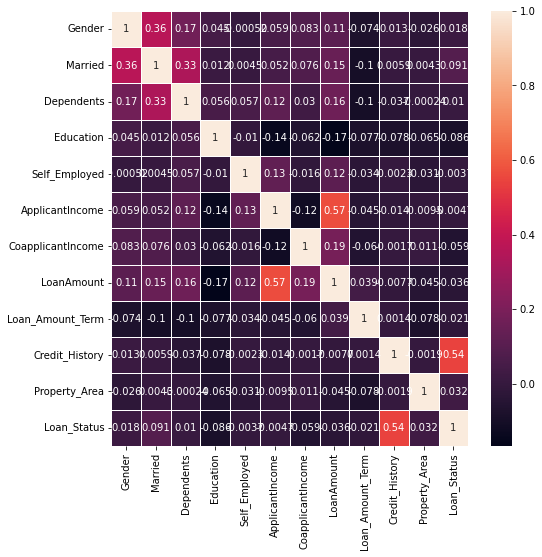

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df.corr(), annot= True, linewidth= .5, ax= ax)
plt.show()

**Separating Data and Target Columns**

In [22]:
X= df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y= df[['Loan_Status']]

**Applying PCA**

In [23]:
pca= PCA(5)

In [24]:
pca.fit(X)

PCA(n_components=5)

In [25]:
pca.components_

array([[ 8.71820055e-02,  1.95816892e-01,  9.75697914e-01,
         2.68292157e-02,  2.04763752e-02,  8.90135998e-03,
         2.63368668e-03,  2.06568997e-02, -1.48434279e-02,
        -1.37156221e-02, -2.86553940e-03],
       [ 1.60326280e-02, -3.23428459e-03, -5.26773647e-03,
         4.67183592e-02,  1.60167725e-02,  6.71042087e-04,
        -1.05918388e-03,  6.46886253e-03,  1.36101141e-02,
         1.58386544e-04, -9.98517363e-01],
       [-5.21455847e-01, -8.24172472e-01,  2.11714112e-01,
        -2.48820029e-03,  3.08951385e-02, -2.32556366e-03,
        -1.28324994e-02, -2.45085789e-02,  2.15532717e-02,
        -4.20116484e-02, -6.30052185e-03],
       [ 6.66836662e-02, -4.17556735e-02, -2.49806875e-02,
         9.70064284e-01, -4.52702622e-02, -2.88834536e-02,
        -1.05433620e-02, -5.81001036e-02, -2.74940337e-02,
        -2.07342774e-01,  4.52064153e-02],
       [-1.05028408e-01,  1.12953862e-01, -2.41443143e-02,
        -1.88050670e-01,  9.24779781e-02,  1.25198797e-02,
  

In [26]:
pcdf= pca.transform(X)
pcdf.shape

(614, 5)

Using 75:25 Splitting

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(pcdf, y, test_size= 0.25, random_state= 101)

**Using kNN Classification**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

In [38]:
k_values= [k for k in range(3, 150,2)]
scores= []
maximum_accuracy , k_value = 0 , 0
for k in k_values:
  knn= KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train, y_train)
  y_pred= knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  if accuracy>maximum_accuracy:
    maximum_accuracy=accuracy
    k_value=k
  scores.append(accuracy)

Text(0, 0.5, 'Accuracy Score')

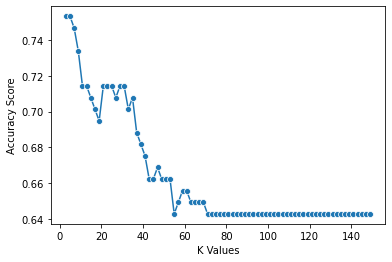

In [39]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [41]:
print("The maximum accuracy of",(round(maximum_accuracy,2)*100), "% is achieved at K =" , k_value )

The maximum accuracy of 75.0 % is achieved at K = 3
